In [24]:
%matplotlib inline
import pandas as pd
import numpy as np

import re
from lxml import etree 
from bz2file import BZ2File
import codecs
import nltk
import pickle

In [3]:
us_videos = pd.read_csv("USvideos1.csv")

In [4]:
us_videos.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [19]:
us_videos["taglength"] = us_videos.tags.str.len()

In [37]:
test = us_videos["dislikes"] > us_videos["likes"]
len (test[test == True])

519

0.018507170443745412

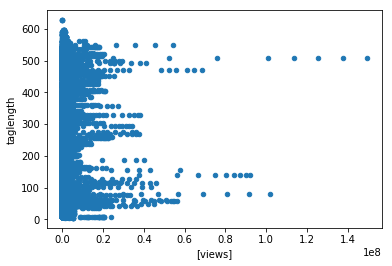

In [27]:
us_videos.plot(y="taglength", x=["views"], kind="scatter")
us_videos['taglength'].corr(us_videos_videos['views'])

In [18]:
us_videos.views /us_videos.tags.str.len() 

0         49891.600000
1         23713.558824
2         10163.802548
3           719.429769
4         17464.425000
5          1254.526316
6          4029.534483
7          3421.472803
8          1720.956250
9           946.221402
10          151.822761
11          225.383621
12         1894.165289
13         1238.113636
14         1086.554974
15         1066.929577
16          622.397895
17          282.768116
18          442.954338
19          877.925490
20          228.384615
21         1142.954082
22          919.859873
23          295.386640
24           87.577320
25         1458.019608
26         1968.414634
27          625.528497
28         1643.705882
29          519.051020
             ...      
24921      2315.924731
24922      1784.560748
24923      5255.116129
24924     11047.892473
24925      1472.792494
24926    126854.733333
24927     14889.323529
24928     31962.811594
24929      5942.605263
24930      1288.983651
24931      1931.519722
24932       609.501259
24933      